In [2]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
import os

In [3]:
df = pd.read_csv(r"F:\ML Projects\Insurance\archive 1\insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

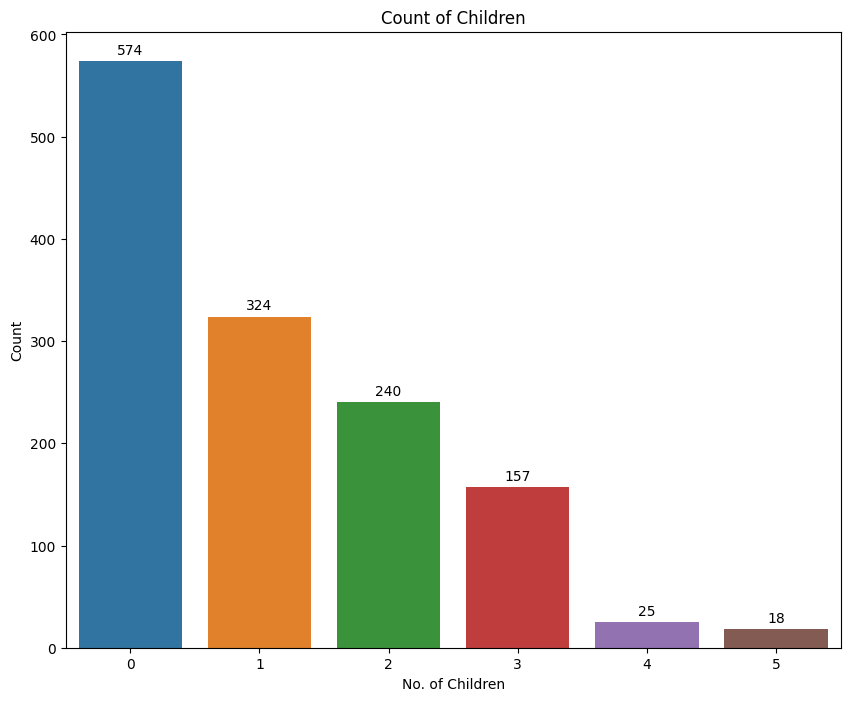

In [8]:
plt.figure(figsize=(10, 8))
x = sns.countplot(data=df, x='children', order=df['children'].value_counts().index)
x.set_title('Count of Children')
x.set_xlabel('No. of Children')
x.set_ylabel('Count')

for p in x.patches:
    x.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 8), 
                 textcoords = 'offset points')
plt.show()

In [9]:
fig = px.histogram(df, 
                   x='age', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(df,
                    x="charges",
                    #marginal="box",
                    color="sex",
                    color_discrete_sequence=["blue", "red"],
                    title="Annual Medical Expenses by Sex")

fig.update_layout(bargap=0.1)
fig.show()

In [11]:
px.histogram(df, x="region", color="smoker", title="Region")

In [12]:
px.histogram(df, x="smoker", color="children", title="Smoker Vs Children")

In [13]:
fig = px.histogram(data_frame=df, x='bmi', y='charges', width=800, height=500, title='Expenses by BMI')
fig.show()

In [14]:
fig = px.scatter(df, x="bmi", y="charges", color='sex', facet_col="children")
fig.update_xaxes(matches=None)
fig.show()

In [15]:
fig = px.scatter(df,
                x="bmi",
                y="charges",
                color="smoker",
                hover_data=['region'],
                opacity=0.9,
                width=1000,
                height=800,
                title= "BMI Vs Charges")

fig.update_traces(marker_size=7)
fig.show()   


In [16]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

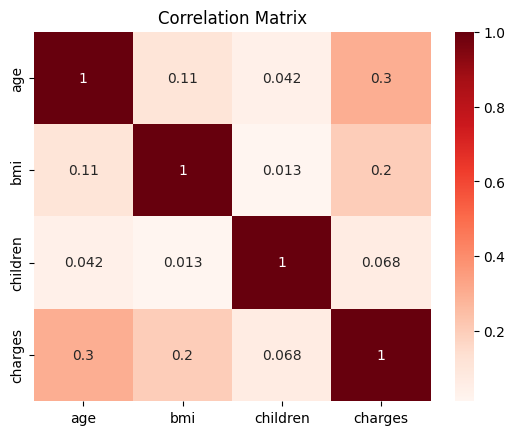

In [17]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [18]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [19]:
# Creating new variables for numerical attributes/columns
numeric_features = ['age', 'bmi', 'children']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['sex', 'smoker','region']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape, y_test.shape)

(1070, 6) (268,)


# Linear Regression

In [22]:
lr = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(lr_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(lr_rmse)))
print(('The r2_score using Linear Regression :{}'.format(lr_r2_score)))

The Mean Squared Error using Linear Regression :33596915.85136147
The Root Mean Squared Error using Linear Regression :5796.2846592762735
The r2_score using Linear Regression :0.7835929767120723


In [23]:
score = []
for i in range(1000):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=i)
    clf = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(r2_score(y_test, y_pred))

In [24]:
np.argmax(score)

367

In [25]:
score[np.argmax(score)]

0.8331693666304849

# Decision Tree Regression

In [26]:
dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
dt.fit(X_train, y_train)
# Predicting the model
y_pred1 = dt.predict(X_test)
# Evaluation Metrics
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = mean_squared_error(y_test, y_pred1, squared=False)
dt_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(dt_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(dt_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(dt_r2_score))

The Mean Squared Error using Decision Tree Regressor : 36657265.7031583
The Root Mean Squared Error using Decision Tree Regressor : 4896.51472057015
The r2_score using Decision Tree Regressor : 0.8368489062020883


# Random Forest Regression

In [27]:
rf_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor(n_estimators=30, max_depth=4, min_samples_split=5,random_state=42))])
rf_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred2 = rf_reg.predict(X_test)

# Evaluation Metrics
rf_mse = mean_squared_error(y_test, y_pred2)
rf_rmse = mean_squared_error(y_test, y_pred2, squared=False)
rf_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(rf_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(rf_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(rf_r2_score))

The Mean Squared Error using Random Forest Regressor : 22141705.30036139
The Root Mean Squared Error using Random Forest Regressor : 4705.497348884748
The r2_score Error using Random Forest Regressor : 0.8493299519017353


# Gradient Boosting Regression

In [28]:
gb_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor(n_estimators=41, max_depth=3, min_samples_split=4, random_state=42))])

gb_reg.fit(X_train, y_train)

# Predicting the model
y_pred3 = gb_reg.predict(X_test)

# Evaluation Metrics
gb_mse = mean_squared_error(y_test, y_pred3)
gb_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gb_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gb_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gb_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gb_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 21487058.692785524
The Root Mean Squared Error using Gradient Boosting Regressor : 4635.413540643976
The r2_sccore using Gradient Boosting Regressor : 0.8537846962185253


# KNN Regression

In [29]:
knn = Pipeline(steps=[('preprocessor', preprocessor),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

knn.fit(X_train, y_train)

# Predictiong The model
y_pred4 = knn.predict(X_test)

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

print("The mean squared error using KNN is {}".format(knn_mse))
print("The root mean squared error using KNN is {}".format(knn_rmse))
print("The r2_score using KNN is {}".format(knn_r2_score))

The mean squared error using KNN is 33302165.095577277
The root mean squared error using KNN is 5770.802812051134
The r2_score using KNN is 0.7733851684565107


# XGBoost Regression

In [30]:
xgb_reg = Pipeline(steps=[('preprocessor', preprocessor),
                ('xgb', xgb.XGBRegressor())])

xgb_reg.fit(X_train, y_train)

# Predicting the moodel
y_pred5 = xgb_reg.predict(X_test)

# Evaluation Metrics
xgb_reg_mse = mean_squared_error(y_test, y_pred5)
xgb_reg_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgb_reg_r2_score = r2_score(y_test, y_pred5)

print("The mean square error using XGBoost is {}".format(xgb_reg_mse))
print("The root mean_squared error using XGBoost is {}".format(xgb_reg_rmse))
print("The r2 score using XGBoost is {}".format(xgb_reg_r2_score))

The mean square error using XGBoost is 30684851.423005763
The root mean_squared error using XGBoost is 5539.390889168751
The r2 score using XGBoost is 0.7911954848519764


In [31]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN', 'XGBoost'],
    'RMSE' : [lr_rmse, dt_rmse, rf_rmse,
            gb_rmse, knn_rmse, xgb_reg_rmse],
    'r2_score' : [lr_r2_score, dt_r2_score, rf_r2_score, 
    gb_r2_score, knn_r2_score, xgb_reg_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
3,Gradient Boosting,4635.413541,0.853785
2,Random Forest,4705.497349,0.849330
1,Decision Tree,4896.514721,0.836849
5,XGBoost,5539.390889,0.791195
4,KNN,5770.802812,0.773385
0,Linear Regression,5796.284659,0.783593


In [32]:

save_model_dir = os.path.join('insurance/models/gb_default_params.pkl')
print("Saving model at: {}".format(save_model_dir))

#save the model
with open(save_model_dir, 'wb') as handle:
    pickle.dump(gb_reg,
                handle,
                protocol=pickle.HIGHEST_PROTOCOL)

Saving model at: insurance/models/gb_default_params.pkl


In [33]:
df.to_csv('insurance_clean.csv')